<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [38]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

print('done')

done


We will import the following libraries for the lab


In [39]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

print('done')

done


This function is to plot the confusion matrix.


In [95]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [41]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [42]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [43]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [44]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [45]:
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [46]:
# students get this 
transform = preprocessing.StandardScaler()
X_std = transform.fit_transform(X)

pd.DataFrame(X_std).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,...,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,...,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-1.71,-1.23,-0.65,-1.58,-0.97,-0.11,-0.11,-0.65,-0.11,-0.55,...,-0.19,-0.22,-0.19,-0.11,-0.53,-1.87,-1.20,-0.84,-0.52,-1.93
25%,-0.86,-0.77,-0.65,-0.95,-0.97,-0.11,-0.11,-0.65,-0.11,-0.55,...,-0.19,-0.22,-0.19,-0.11,-0.53,0.53,-1.20,-0.84,-0.52,0.52
50%,0.00,-0.30,-0.65,0.32,-0.39,-0.11,-0.11,-0.65,-0.11,-0.55,...,-0.19,-0.22,-0.19,-0.11,-0.53,0.53,0.84,-0.84,-0.52,0.52
75%,0.86,0.60,0.17,0.95,0.79,-0.11,-0.11,1.53,-0.11,-0.55,...,-0.19,-0.22,-0.19,-0.11,-0.53,0.53,0.84,1.20,-0.52,0.52
max,1.71,2.03,3.49,0.95,1.97,9.43,9.43,1.53,9.43,1.81,...,5.39,4.64,5.39,9.43,1.87,0.53,0.84,1.20,1.93,0.52


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [48]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [49]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [50]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

## TASK  5


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [51]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Calculate the accuracy on the test data using the method <code>score</code>:


In [52]:
logreg_best = logreg_cv.best_estimator_
test_score_lr = logreg_best.score(X_test, Y_test)
print(f'{test_score:.3f}')

0.833


Lets look at the confusion matrix:


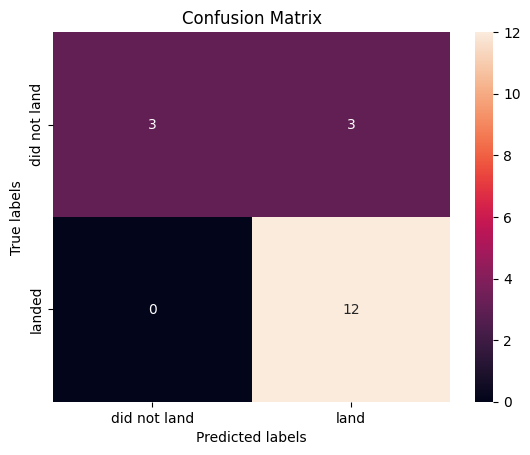

In [96]:
yhat=logreg_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [54]:
parameters = {'kernel':('linear','poly','rbf','sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [55]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [56]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [57]:
svm_best = svm_cv.best_estimator_
test_score_svm = svm_best.score(X_test, Y_test)
print(f'{test_score:.3f}')

0.833


We can plot the confusion matrix


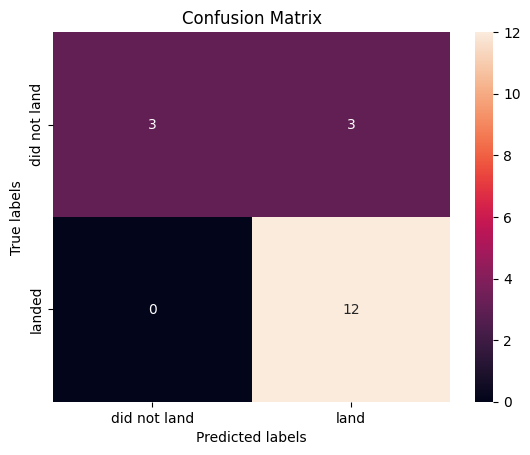

In [58]:
yhat=svm_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [82]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt','log2',None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [83]:
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [84]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8714285714285713


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [85]:
tree_best = tree_cv.best_estimator_
test_score_tree = tree_best.score(X_test, Y_test)
print(f'{test_score:.3f}')

0.833


We can plot the confusion matrix


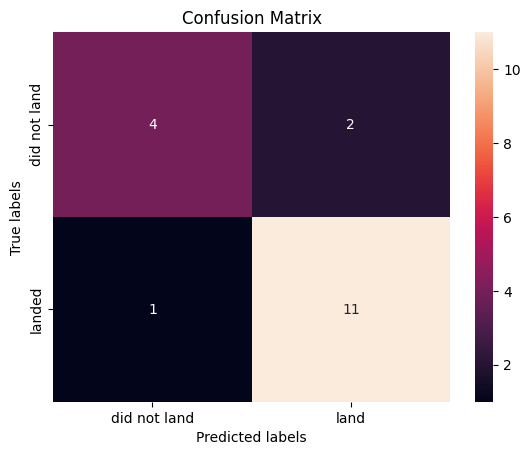

In [86]:
yhat = tree_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [64]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [65]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [66]:
knn_best = knn_cv.best_estimator_
test_score_knn = knn_best.score(X_test, Y_test)
print(f'{test_score:.3f}')

0.833


We can plot the confusion matrix


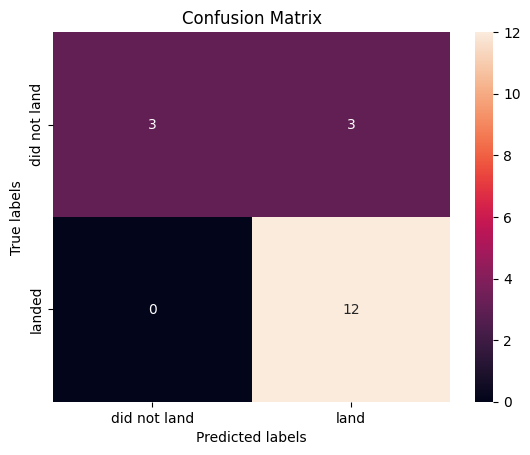

In [67]:
yhat = knn_best.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


LogReg Testing Accuracy: 0.833
SVM Testing Accuracy: 0.833
DecTree Testing Accuracy: 0.833
KNN Testing Accuracy: 0.833

LogReg Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


SVM Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


DecTree Testing Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
   

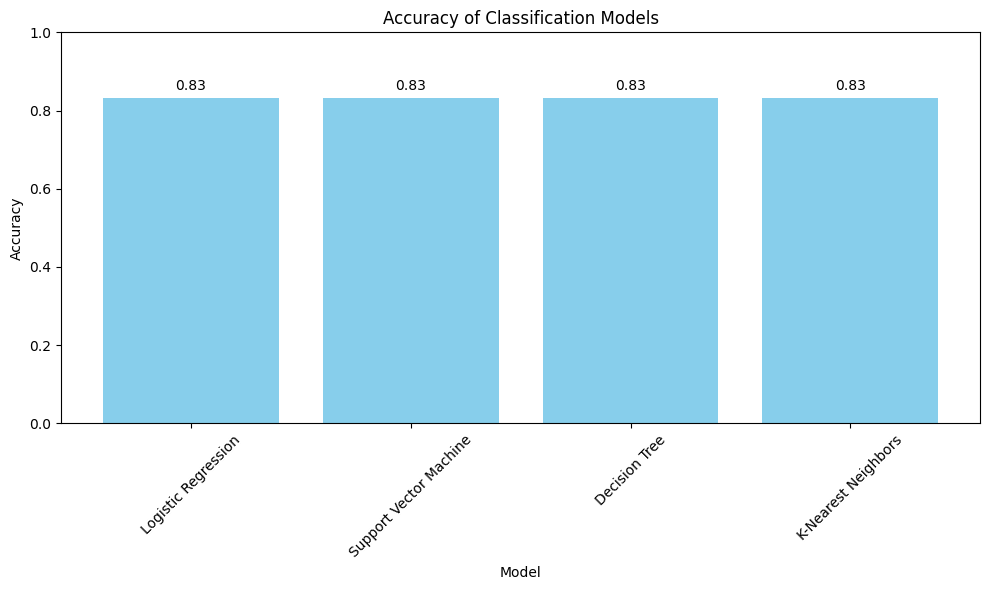

LogReg Training Accuracy: 0.875
SVM Training Accuracy: 0.889
DecTree Training Accuracy: 0.889
KNN Training Accuracy: 0.861

LogReg Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        24
           1       0.84      1.00      0.91        48

    accuracy                           0.88        72
   macro avg       0.92      0.81      0.84        72
weighted avg       0.89      0.88      0.87        72


SVM Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        24
           1       0.86      1.00      0.92        48

    accuracy                           0.89        72
   macro avg       0.93      0.83      0.86        72
weighted avg       0.90      0.89      0.88        72


DecTree Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       

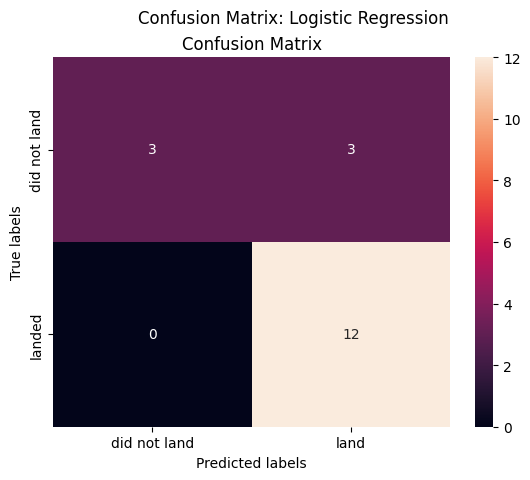

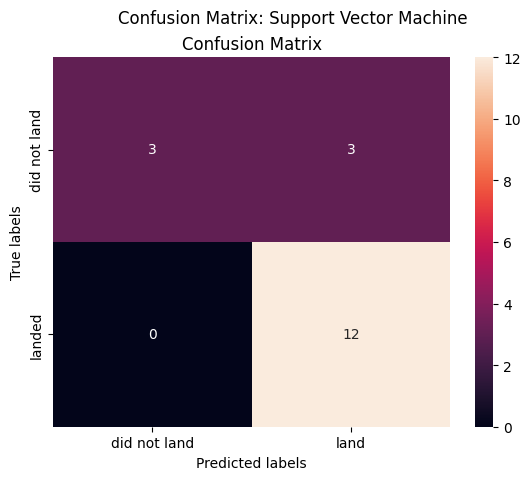

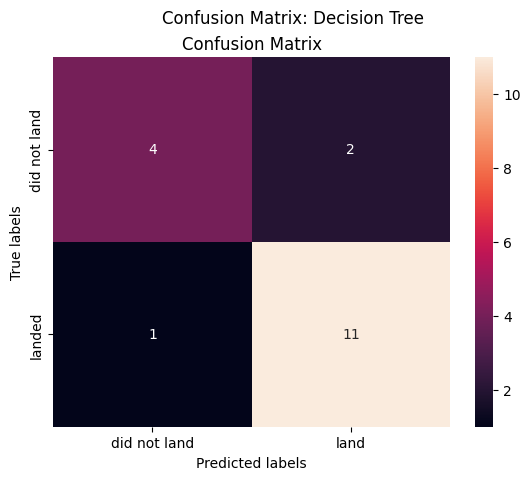

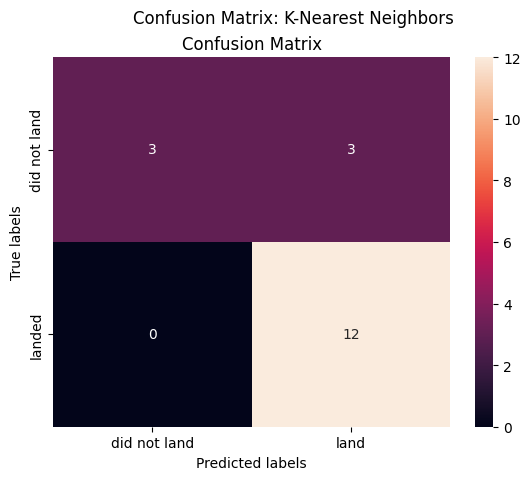

In [89]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.metrics import accuracy_score, f1_score, classification_report

Y_pred_lr = logreg_best.predict(X_test)
Y_pred_svm = svm_best.predict(X_test)
Y_pred_tree = tree_best.predict(X_test)
Y_pred_knn = knn_best.predict(X_test)

print(f"LogReg Testing Accuracy: {accuracy_score(Y_test, Y_pred_lr):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(Y_test, Y_pred_svm):.3f}")
print(f"DecTree Testing Accuracy: {accuracy_score(Y_test, Y_pred_tree):.3f}")
print(f"KNN Testing Accuracy: {accuracy_score(Y_test, Y_pred_knn):.3f}")

print("\nLogReg Testing Classification Report:")
print(classification_report(Y_test, Y_pred_lr))

print("\nSVM Testing Classification Report:")
print(classification_report(Y_test, Y_pred_svm))

print("\nDecTree Testing Classification Report:")
print(classification_report(Y_test, Y_pred_tree))

print("\nKNN Testing Classification Report:")
print(classification_report(Y_test, Y_pred_knn))

test_accuracies = {
    'Logistic Regression': test_score_lr,
    'Support Vector Machine': test_score_svm,
    'Decision Tree': test_score_tree,
    'K-Nearest Neighbors': test_score_knn
}

models = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Accuracy of Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Y_pred_train_lr = logreg_best.predict(X_train)
Y_pred_train_svm = svm_best.predict(X_train)
Y_pred_train_tree = tree_best.predict(X_train)
Y_pred_train_knn = knn_best.predict(X_train)

print(f"LogReg Training Accuracy: {accuracy_score(Y_train, Y_pred_train_lr):.3f}")
print(f"SVM Training Accuracy: {accuracy_score(Y_train, Y_pred_train_svm):.3f}")
print(f"DecTree Training Accuracy: {accuracy_score(Y_train, Y_pred_train_tree):.3f}")
print(f"KNN Training Accuracy: {accuracy_score(Y_train, Y_pred_train_knn):.3f}")

print("\nLogReg Training Classification Report:")
print(classification_report(Y_train, Y_pred_train_lr))

print("\nSVM Training Classification Report:")
print(classification_report(Y_train, Y_pred_train_svm))

print("\nDecTree Training Classification Report:")
print(classification_report(Y_train, Y_pred_train_tree))

print("\nKNN Training Classification Report:")
print(classification_report(Y_train, Y_pred_train_knn))

yhat_lr_best = logreg_best.predict(X_test)
plt.figure()
plt.suptitle('Confusion Matrix: Logistic Regression')
plot_confusion_matrix(Y_test, yhat_lr_best)

yhat_svm_best = svm_best.predict(X_test)
plt.figure()
plt.suptitle('Confusion Matrix: Support Vector Machine')
plot_confusion_matrix(Y_test, yhat_svm_best)

yhat_tree_best = tree_best.predict(X_test)
plt.figure()
plt.suptitle('Confusion Matrix: Decision Tree')
plot_confusion_matrix(Y_test, yhat_tree_best)

yhat_knn_best = knn_best.predict(X_test)
plt.figure()
plt.suptitle('Confusion Matrix: K-Nearest Neighbors')
plot_confusion_matrix(Y_test, yhat_knn_best)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
